In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)


men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


In [4]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
test_data.drop("Cabin", axis=1, inplace=True)
train_data.drop("Cabin", axis=1, inplace=True)

In [8]:
import seaborn as sns

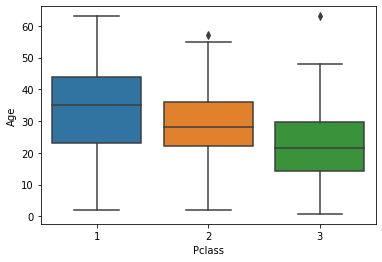

In [9]:
sns.boxplot(x="Pclass", y="Age", data=train_data[train_data["Sex"]=="female"])

In [10]:
class1male = int(train_data[(train_data["Pclass"]==1) & (train_data["Sex"]=="male")]["Age"].mean())
class2male = int(train_data[(train_data["Pclass"]==2) & (train_data["Sex"]=="male")]["Age"].mean())
class3male = int(train_data[(train_data["Pclass"]==3) & (train_data["Sex"]=="male")]["Age"].mean())

class1female = int(train_data[(train_data["Pclass"]==1) & (train_data["Sex"]=="female")]["Age"].mean())
class2female = int(train_data[(train_data["Pclass"]==2) & (train_data["Sex"]=="female")]["Age"].mean())
class3female = int(train_data[(train_data["Pclass"]==3) & (train_data["Sex"]=="female")]["Age"].mean())

In [11]:
class1male, class2male, class3male, class1female, class2female, class3female

(41, 30, 26, 34, 28, 21)

In [12]:
def set_age(cols):
    pclass = cols[0]
    sex = cols[1]
    age = cols[2]
    if pd.isnull(age):
        if pclass == 1:
            if sex == "male":
                return class1male
            else:
                return class1female
        elif pclass == 2:
            if sex == "male":
                return class2male
            else:
                return class2female
        else:
            if sex == "male":
                return class3male
            else:
                return class3female
    else:
        return age

In [13]:
train_data["Age"] = train_data[["Pclass", "Sex", "Age"]].apply(set_age, axis=1)

In [14]:
test_data["Age"] = test_data[["Pclass", "Sex", "Age"]].apply(set_age, axis=1)

In [15]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [16]:
test_data[pd.isnull(test_data["Fare"])]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [17]:
fare = int(train_data[(train_data["Pclass"]==3) & (train_data["Sex"]=="male")]["Fare"].mean())
fare

12

In [18]:
test_data["Fare"] = test_data["Fare"].apply(lambda x: fare if pd.isnull(x) else x)

In [19]:
test_data[test_data["Fare"] == fare]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,12.0,S


In [20]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [22]:
train_data[pd.isnull(train_data["Embarked"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [23]:
train_data[train_data["Ticket"]=="113572"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


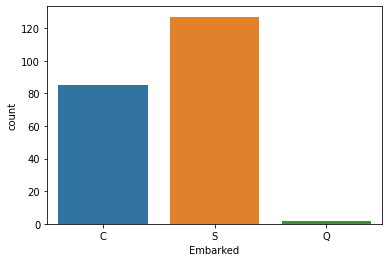

In [24]:
sns.countplot(x="Embarked", data=train_data[train_data["Pclass"] == 1])

In [25]:
train_data["Embarked"] = train_data["Embarked"].apply(lambda x: "S" if pd.isnull(x) else x)

In [26]:
train_data[train_data["Ticket"]=="113572"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,S


In [27]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [28]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [29]:
train_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,26.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [30]:
sex = pd.get_dummies(train_data["Sex"], drop_first=True)
embark = pd.get_dummies(train_data["Embarked"], drop_first=True)

train_data = pd.concat([train_data, sex, embark], axis=1)

In [31]:
train_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1
5,6,0,3,"Moran, Mr. James",male,26.0,0,0,330877,8.4583,Q,1,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0,0,0


In [32]:
train_data.drop(["Name", "Sex", "Ticket", "Embarked"], inplace=True, axis=1)

In [33]:
train_data.head(20)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
5,6,0,3,26.0,0,0,8.4583,1,1,0
6,7,0,1,54.0,0,0,51.8625,1,0,1
7,8,0,3,2.0,3,1,21.0750,1,0,1
8,9,1,3,27.0,0,2,11.1333,0,0,1
9,10,1,2,14.0,1,0,30.0708,0,0,0


In [34]:
sex = pd.get_dummies(test_data["Sex"], drop_first=True)
embark = pd.get_dummies(test_data["Embarked"], drop_first=True)

test_data = pd.concat([test_data, sex, embark], axis=1)

test_data.drop(["Name", "Sex", "Ticket", "Embarked"], inplace=True, axis=1)

In [35]:
test_data.head(20)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1
5,897,3,14.0,0,0,9.2250,1,0,1
6,898,3,30.0,0,0,7.6292,0,1,0
7,899,2,26.0,1,1,29.0000,1,0,1
8,900,3,18.0,0,0,7.2292,0,0,0
9,901,3,21.0,2,0,24.1500,1,0,1


In [36]:
# pc = pd.get_dummies(train_data["Pclass"], drop_first=True)

# train_data = pd.concat([train_data, pc], axis=1)

# pc = pd.get_dummies(test_data["Pclass"], drop_first=True)

# test_data = pd.concat([test_data, pc], axis=1)

In [37]:
# train_data.drop("Pclass", axis=1, inplace=True)
# test_data.drop("Pclass", axis=1, inplace=True)

In [38]:
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

X = train_data.drop("Survived", axis=1)
y = train_data["Survived"]
X_test = test_data




svc=make_pipeline(StandardScaler(),SVC(random_state=1))
r=[0.0001,0.001,0.1,1,10,50,100]
PSVM=[{'svc__C':r, 'svc__kernel':['linear']},
      {'svc__C':r, 'svc__gamma':r, 'svc__kernel':['rbf']}]
GSSVM=GridSearchCV(estimator=svc, param_grid=PSVM, scoring='accuracy', cv=2)
scores_svm=cross_val_score(GSSVM, X.astype(float), y,scoring='accuracy', cv=5)


model=GSSVM.fit(X, y)

predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
